In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# since the first column and third column are not required we can drop them
data_without_columns = data.drop(['car_ID','CarName'], axis = 1)
data_without_columns.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#we can now convert the categorical data into numerical data
data_without_categorical = pd.get_dummies(data_without_columns, drop_first=True)
data_without_categorical.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [5]:
# now let us define x and y
X = data_without_categorical.drop('price', axis=1).values
Y = data_without_categorical['price'].values
print(X.shape)
print(Y.shape)

(205, 43)
(205,)


In [6]:
# normalizing data
X_normalized = (X - X.mean()) / (X.max() - X.min())
Y_normalized = (Y - Y.mean()) / (Y.max() - Y.min())
print(X_normalized)
print(Y_normalized)

[[-0.02907860953460709 -0.01611284158550076 -0.003965007595800667 ...
  -0.029381548038090885 -0.02953301728983278 -0.02953301728983278]
 [-0.02907860953460709 -0.01611284158550076 -0.003965007595800667 ...
  -0.029381548038090885 -0.02953301728983278 -0.02953301728983278]
 [-0.029381548038090885 -0.01521917300022357 -0.003601481391620119 ...
  -0.029381548038090885 -0.02953301728983278 -0.02953301728983278]
 ...
 [-0.029684486541574677 -0.013007721924791884 -0.0009356225609627388 ...
  -0.029381548038090885 -0.02953301728983278 -0.02953301728983278]
 [-0.029684486541574677 -0.013007721924791884 -0.0009356225609627388 ...
  -0.02953301728983278 -0.02953301728983278 -0.02953301728983278]
 [-0.029684486541574677 -0.013007721924791884 -0.0009356225609627388 ...
  -0.029381548038090885 -0.02953301728983278 -0.02953301728983278]]
[ 5.41903156e-03  8.00181081e-02  8.00181081e-02  1.67143992e-02
  1.03601843e-01  4.89868782e-02  1.10056339e-01  1.40094569e-01
  2.63102364e-01  1.13759407e-01 

In [7]:
# LET US NOW DEFINE SOME FUNCTIONS WHICH WILL BE CALLED LATER

In [8]:
def calculate_cost (X,Y,w,b,m):
    Y_hat = np.dot(X, w) + b
    cost = (1 / ( 2 * m )) * np.sum((Y_hat - Y) ** 2)
    return cost

In [9]:
def gradient_descent (X, Y, w, b, iterations, learning_rate, m):
    cost_list = []
    for i in range(iterations):
        Y_hat = np.dot(X, w) + b
        w_derivative = (1 / m) * np.dot(X.T, (Y_hat - Y))
        b_derivative = (1 / m) * np.sum(Y_hat - Y)
        w = w - learning_rate * w_derivative
        b = b - learning_rate * b_derivative
        cost = calculate_cost(X, Y, w, b, m)
        cost_list.append(cost) 
        if i % 50 == 0:
            print("The iteration is", i, "and MSE is", cost)

    return w , b, cost_list

In [10]:
# let us define some parameters
learning_rate = 1
b = 0
w = np.zeros(X_normalized.shape[1])
iterations = 1000
m = len(Y)

w, b, cost_list = gradient_descent(X_normalized, Y_normalized, w, b, iterations, learning_rate, m)


The iteration is 0 and MSE is 0.019404853312346215
The iteration is 50 and MSE is 0.013429404321093429
The iteration is 100 and MSE is 0.010267488481015998
The iteration is 150 and MSE is 0.008524337524152341
The iteration is 200 and MSE is 0.007513732114223592
The iteration is 250 and MSE is 0.00689387099403907
The iteration is 300 and MSE is 0.006491537307527245
The iteration is 350 and MSE is 0.006216710750146684
The iteration is 400 and MSE is 0.006020949259861487
The iteration is 450 and MSE is 0.005876986165606636
The iteration is 500 and MSE is 0.005768637047487079
The iteration is 550 and MSE is 0.005685737091545915
The iteration is 600 and MSE is 0.005621548825935181
The iteration is 650 and MSE is 0.005571395188743992
The iteration is 700 and MSE is 0.005531909682553914
The iteration is 750 and MSE is 0.005500604349565602
The iteration is 800 and MSE is 0.005475606693747805
The iteration is 850 and MSE is 0.0054554902468494796
The iteration is 900 and MSE is 0.005439159749025

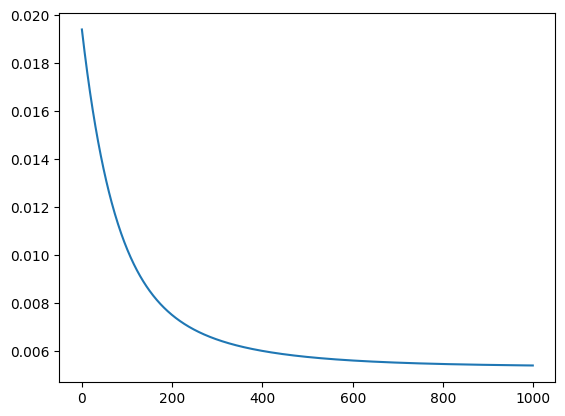

Values of w after iterations [0.03004619398202876 0.02380376817993254 0.03582741827545863
 0.029221140611100985 0.01479300367618285 2.092650221336706
 0.37507618932038383 0.028115329831547756 0.026877963494648424
 0.023608544322225453 0.3505408208362931 0.30161612777185093
 -0.007526235238248854 -0.0071642861073106115 0.027790125847545286
 0.027190001232501912 0.02900855818823192 0.028571471792908185
 0.02662201508873495 0.02850000513113077 0.02617519877918609
 0.02539423618320794 0.030233908776122642 0.028679957537787338
 0.027832502210372256 0.026808624876667738 0.026749828536608237
 0.02821858633523178 0.028460208529570884 0.027732209726029786
 0.028129935955085422 0.023822070928753086 0.029515426723341013
 0.02772231065053269 0.027809175425145372 0.027732209726029786
 0.02618295124760933 0.027685180391050584 0.027399944611562848
 0.02761025999953332 0.02990783375589676 0.0272769125758784
 0.027592100672903012]
Value of b after iterations: -0.936781424965378
RMSE: 4191.988062738693


In [14]:
range_iterations = np.arange(0, iterations)
plt.plot(range_iterations, cost_list)
plt.show()
print("Values of w after iterations", w)
print("Value of b after iterations:", b)

Y_hat_normalized = np.dot(X_normalized, w) + b  
Y_hat = Y_hat_normalized * (Y.max() - Y.min()) + Y.mean()  # Convert back to original scale

rmse = np.sqrt(np.mean((Y_hat - Y) ** 2))
print("RMSE:", rmse)